<a href="https://colab.research.google.com/github/physteacherlab/qe_data_science/blob/Physics-Data-Analysis/QE_DS_classwork_answers_all_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи для самостоятельной работы по анализу данных

В этом разделе 5 задач, которые помогут закрепить навыки загрузки, обработки, анализа и визуализации данных на Python.

Для каждой задачи предусмотрен свой CSV-файл с исходными данными.
Внимательно читайте условия и используйте подсказки к решению.

## Задача 1: Очистка временного ряда с пропусками и выбросами

Дан csv-файл с двумя столбцами: "time" (временные точки) и "value" (значения ряда). Есть пропуски и выбросы.


### Задание:
- Загрузите данные с помощью pandas.
- Обработайте пропуски методом интерполяции по времени.
- Примените медианный фильтр (с окном 3 или 5) для замены выбросов.
- Постройте график до и после очистки.

### Подсказки:
- Используйте `pandas.read_csv`, `df.interpolate(method='time')`.
- Для медианного фильтра — `scipy.signal.medfilt`.
- Для визуализации — `matplotlib.pyplot.plot`.

## Решение задачи 1

1) Загрузка и базовый просмотр данных


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Загрузка данных
df = pd.read_csv('task1_time_series.csv', parse_dates=['time'])

# Установим время как индекс (удобно для интерполяции по времени)
df = df.set_index('time')

print(df.head())
print(df.isna().sum())  # смотрим пропуски

               value
time                
2024-01-01  0.529216
2024-01-02  0.309298
2024-01-03  0.665284
2024-01-04  1.212909
2024-01-05  1.250346
value    10
dtype: int64


2) Визуализация исходного ряда


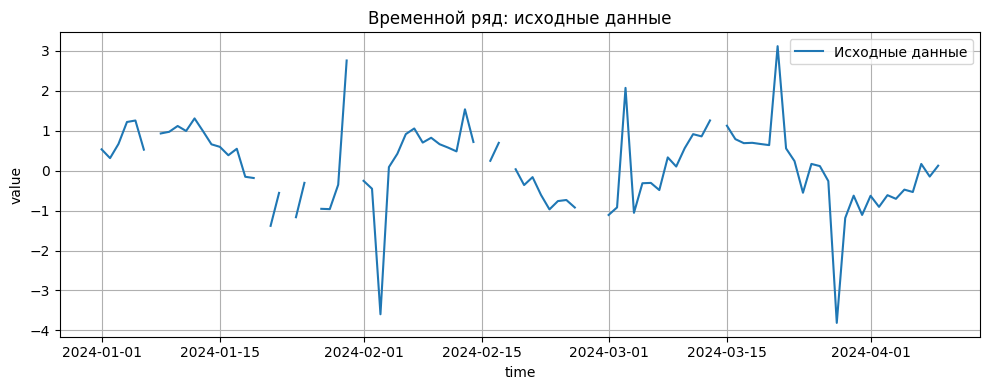

In [2]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['value'], label='Исходные данные')
plt.xlabel('time')
plt.ylabel('value')
plt.title('Временной ряд: исходные данные')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


3) Обработка пропусков интерполяцией по времени


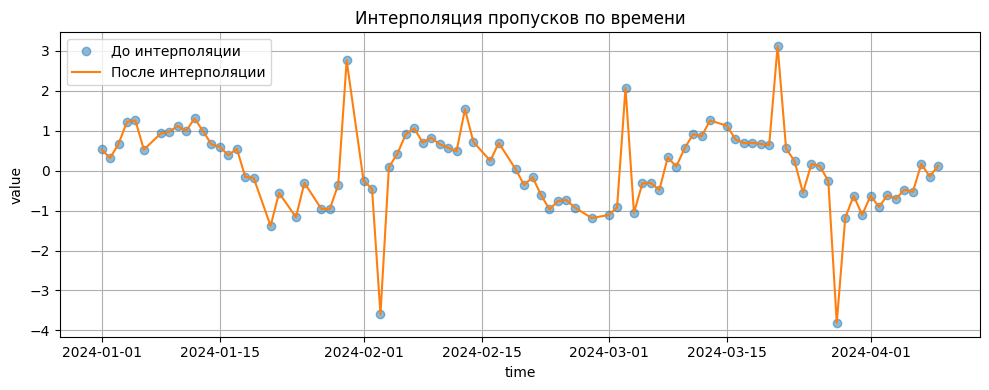

In [3]:
# Интерполяция по времени
df_interp = df.copy()
df_interp['value'] = df_interp['value'].interpolate(method='time')

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['value'], 'o', label='До интерполяции', alpha=0.5)
plt.plot(df_interp.index, df_interp['value'], '-', label='После интерполяции')
plt.xlabel('time')
plt.ylabel('value')
plt.title('Интерполяция пропусков по времени')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


4) Сглаживание выбросов медианным фильтром


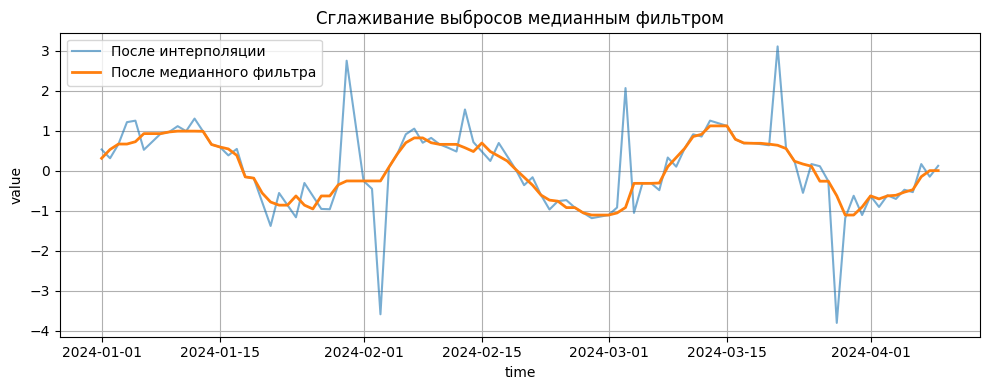

In [4]:
from scipy.signal import medfilt

# Применим медианный фильтр (окно 5 точек)
df_filt = df_interp.copy()
df_filt['value_filt'] = medfilt(df_filt['value'], kernel_size=5)

plt.figure(figsize=(10, 4))
plt.plot(df_interp.index, df_interp['value'], label='После интерполяции', alpha=0.6)
plt.plot(df_filt.index, df_filt['value_filt'], label='После медианного фильтра', linewidth=2)
plt.xlabel('time')
plt.ylabel('value')
plt.title('Сглаживание выбросов медианным фильтром')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


5) Итоговый сравнительный график "до и после"

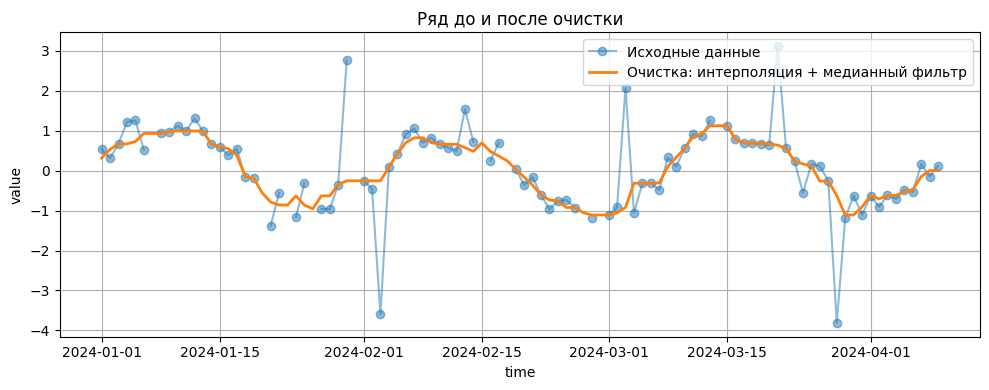

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['value'], 'o-', label='Исходные данные', alpha=0.5)
plt.plot(df_filt.index, df_filt['value_filt'], '-', label='Очистка: интерполяция + медианный фильтр', linewidth=2)
plt.xlabel('time')
plt.ylabel('value')
plt.title('Ряд до и после очистки')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Задача 2: Сглаживание и НЧ-фильтрация временного сигнала

Дан csv с временным рядом: "time", "signal" — сигнал содержит полезный тренд, гармонический компонент и шум.

### Задание:
- Загрузите данные из csv.
- Выполните скользящее среднее и экспоненциальное сглаживание.
- Посчитайте спектр через БПФ, выделите доминирующую частоту.
- Реализуйте низкочастотный фильтр: обнулите спектр выше выбранного порога и восстановите сигнал.
- Постройте графики: исходный сигнал, оба вида сглаженных сигналов, спектр, отфильтрованный сигнал.

## Решение задачи 2

1) Выполним загрузку данных и первичный просмотр с помощью `pandas`

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('task2_signal.csv', parse_dates=['time'])
df = df.set_index('time')

df.head(), df.describe()

(                       signal
 time                         
 2024-01-01 00:00:00  0.324869
 2024-01-01 00:01:00  0.033157
 2024-01-01 00:02:00  0.190258
 2024-01-01 00:03:00  0.192915
 2024-01-01 00:04:00  0.652610,
            signal
 count  200.000000
 mean     0.120838
 std      0.417410
 min     -0.829440
 25%     -0.206850
 50%      0.086037
 75%      0.471202
 max      0.927058)

2) Выполним визуализацию исходного сигнала с помощью `matplotlib`

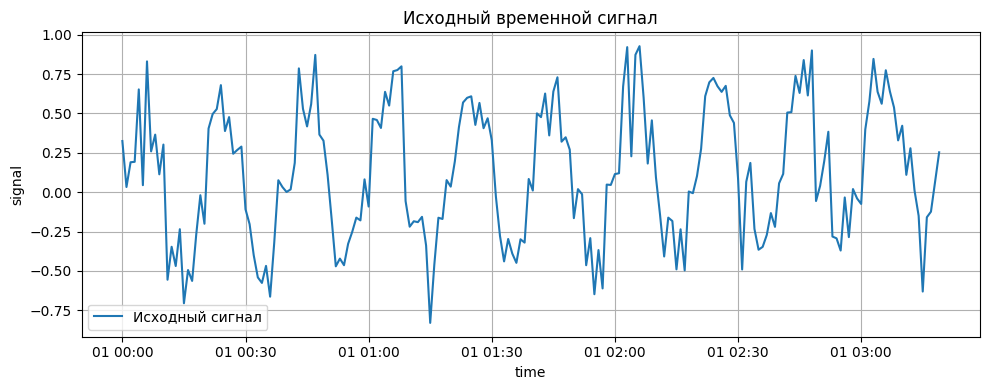

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['signal'], label='Исходный сигнал')
plt.xlabel('time')
plt.ylabel('signal')
plt.title('Исходный временной сигнал')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

3) Выполним сглашивание по методу "скользящее среднее"


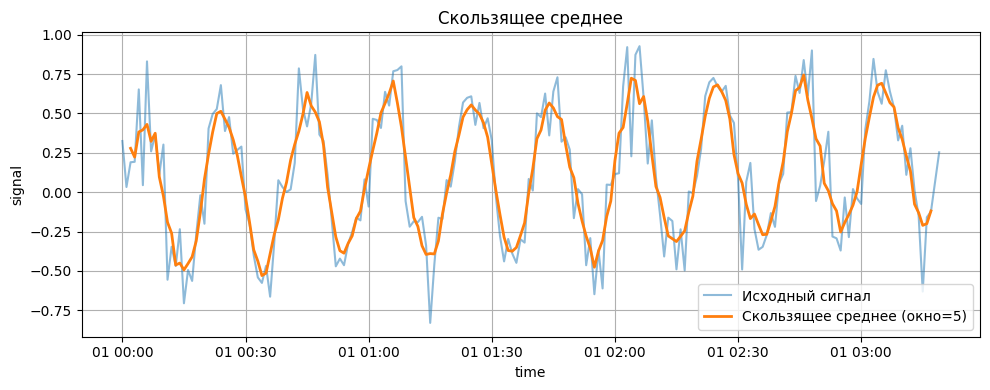

In [8]:
window = 5  # размер окна в точках

df['rolling_mean'] = df['signal'].rolling(window=window, center=True).mean()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['signal'], label='Исходный сигнал', alpha=0.5)
plt.plot(df.index, df['rolling_mean'], label=f'Скользящее среднее (окно={window})', linewidth=2)
plt.xlabel('time')
plt.ylabel('signal')
plt.title('Скользящее среднее')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

4) Выполним экспоненциальное сглаживание


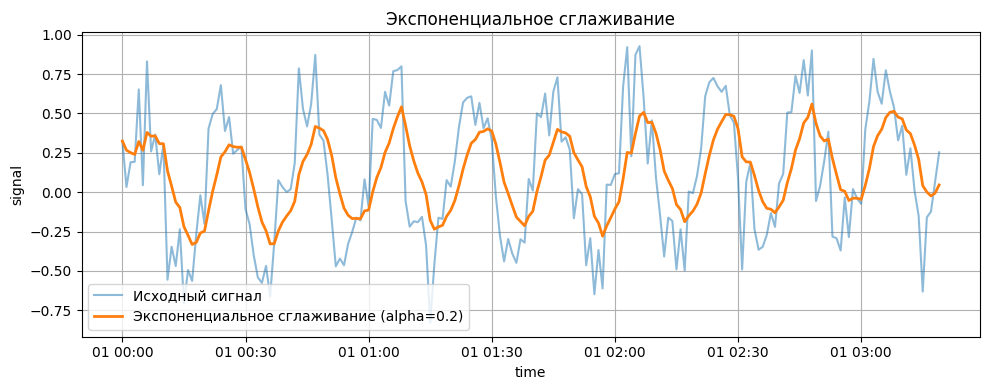

In [9]:
alpha = 0.2  # сглаживающий параметр

df['exp_smooth'] = df['signal'].ewm(alpha=alpha, adjust=False).mean()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['signal'], label='Исходный сигнал', alpha=0.5)
plt.plot(df.index, df['exp_smooth'], label=f'Экспоненциальное сглаживание (alpha={alpha})', linewidth=2)
plt.xlabel('time')
plt.ylabel('signal')
plt.title('Экспоненциальное сглаживание')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

5) Сделаем расчет спектра (БПФ) и поиск доминирующей частоты.
Предположим равномерную дискретизацию по времени. Для частот используем `np.fft.rfftfreq`.

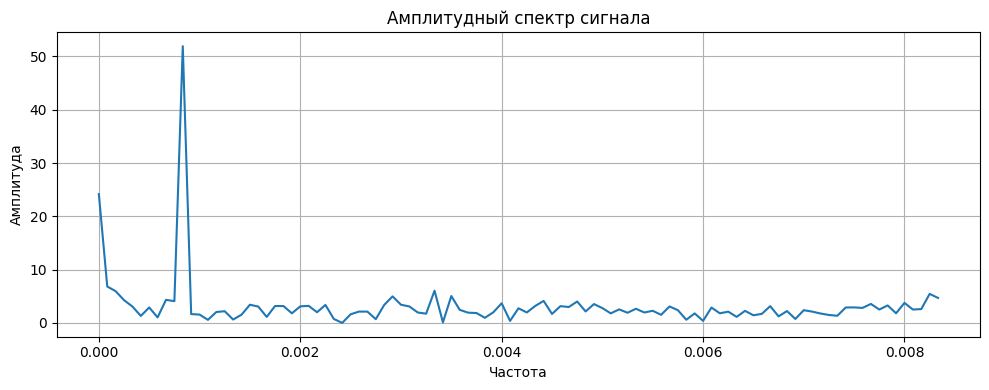

Доминирующая частота: 0.0008333333333333333


In [10]:
signal = df['signal'].values
N = len(signal)

# шаг по времени (в секундах или условных единицах)
dt = (df.index[1] - df.index[0]).total_seconds()  # для минут можно оставить так или использовать минуты

# Прямое БПФ
fft_vals = np.fft.rfft(signal)
freqs = np.fft.rfftfreq(N, d=dt)

# Амплитудный спектр
amplitude = np.abs(fft_vals)

plt.figure(figsize=(10, 4))
plt.plot(freqs, amplitude)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.title('Амплитудный спектр сигнала')
plt.grid(True)
plt.tight_layout()
plt.show()

# Поиск доминирующей частоты (кроме нуля)
dominant_idx = np.argmax(amplitude[1:]) + 1
dominant_freq = freqs[dominant_idx]
print("Доминирующая частота:", dominant_freq)

6) Построим простой низкочастотный фильтр в частотной области. Сделаем «идеальный» НЧ-фильтр: обрежем все частоты выше порога `f_cut`.

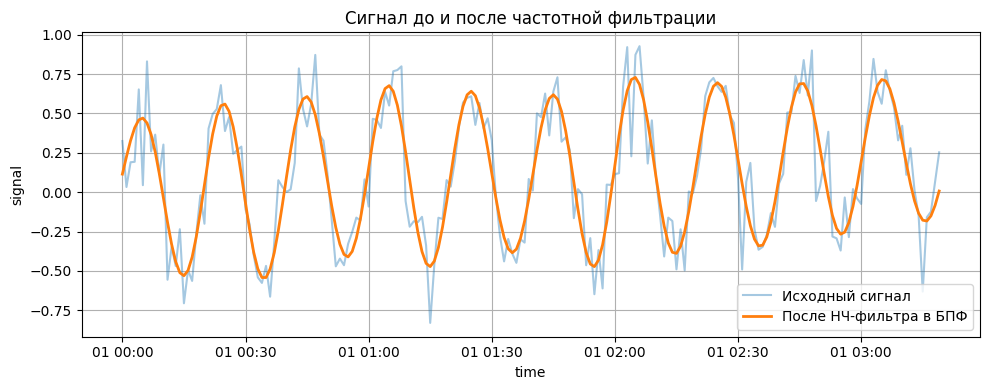

In [11]:
# Задаем частоту среза (например, чуть выше найденной доминирующей)
f_cut = dominant_freq * 1.5

fft_filtered = fft_vals.copy()
fft_filtered[freqs > f_cut] = 0  # зануляем высокие частоты

# Обратное БПФ
signal_filtered = np.fft.irfft(fft_filtered, n=N)

df['signal_filtered'] = signal_filtered

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['signal'], label='Исходный сигнал', alpha=0.4)
plt.plot(df.index, df['signal_filtered'], label='После НЧ-фильтра в БПФ', linewidth=2)
plt.xlabel('time')
plt.ylabel('signal')
plt.title('Сигнал до и после частотной фильтрации')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

7) Сравним все примененные методы сглаживания.

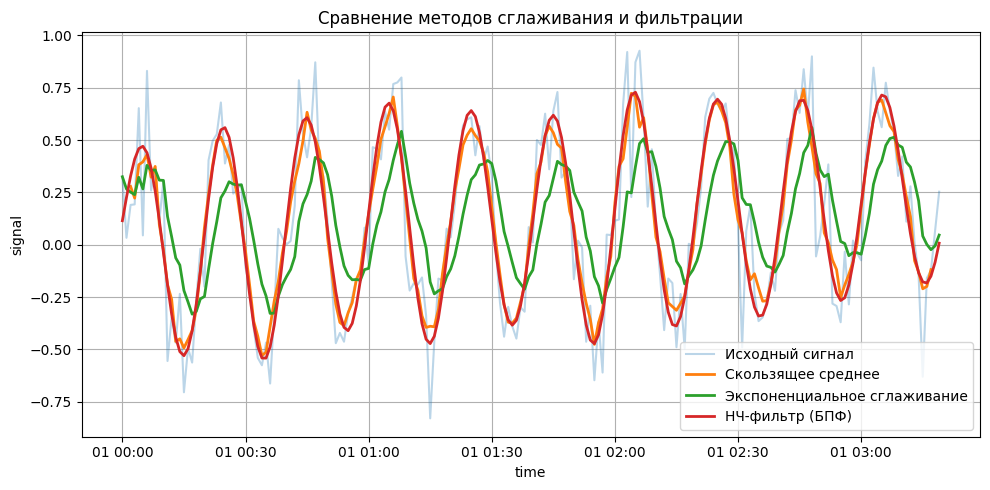

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['signal'], label='Исходный сигнал', alpha=0.3)
plt.plot(df.index, df['rolling_mean'], label='Скользящее среднее', linewidth=2)
plt.plot(df.index, df['exp_smooth'], label='Экспоненциальное сглаживание', linewidth=2)
plt.plot(df.index, df['signal_filtered'], label='НЧ-фильтр (БПФ)', linewidth=2)
plt.xlabel('time')
plt.ylabel('signal')
plt.title('Сравнение методов сглаживания и фильтрации')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Задача 3: Подбор параметров модели и доверительные интервалы

В csv два столбца: "x", "y" — экспериментальные данные, \(y=f(x) + \) шум.

### Задание:
- Загрузите данные.
- Подберите параметры линейной модели двумя способами: формулы МНК и `scipy.optimize.curve_fit`.
- Рассчитайте ковариационную матрицу параметров, стандартные ошибки и 95% доверительные интервалы.
- Постройте график с данными, линией модели и доверительной полосой.

## Решение задачи 3

1) Загрузка данных и первичный анализ

         x         y
0  0.00000  0.166484
1  0.10101  1.139992
2  0.20202 -2.767342
3  0.30303  5.038117
4  0.40404 -1.576770
                x           y
count  100.000000  100.000000
mean     5.000000   13.292518
std      2.930454    7.793366
min      0.000000   -2.767342
25%      2.500000    6.359808
50%      5.000000   13.464566
75%      7.500000   19.599393
max     10.000000   28.094538


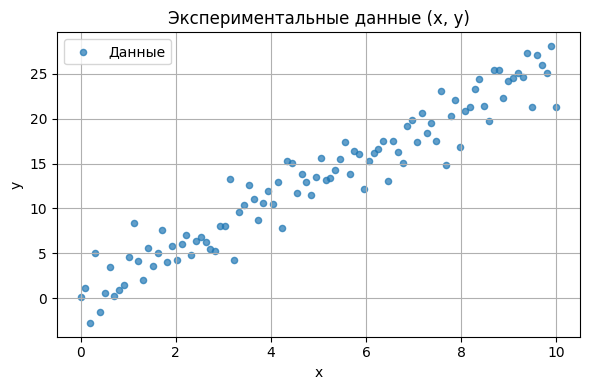

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('task3_model_fit.csv')

print(df.head())
print(df.describe())

x = df['x'].values
y = df['y'].values

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=20, alpha=0.7, label='Данные')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Экспериментальные данные (x, y)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

2) Составление линейной регрессии по формулам для МНК (ручным способом)

In [14]:
n = len(x)

Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x * y)

a_mnk = (n * Sxy - Sx * Sy) / (n * Sxx - Sx**2)
b_mnk = (Sy - a_mnk * Sx) / n

print(f'Коэффициенты МНК (формулы): a = {a_mnk:.3f}, b = {b_mnk:.3f}')

Коэффициенты МНК (формулы): a = 2.563, b = 0.476


3) Визуализация результата


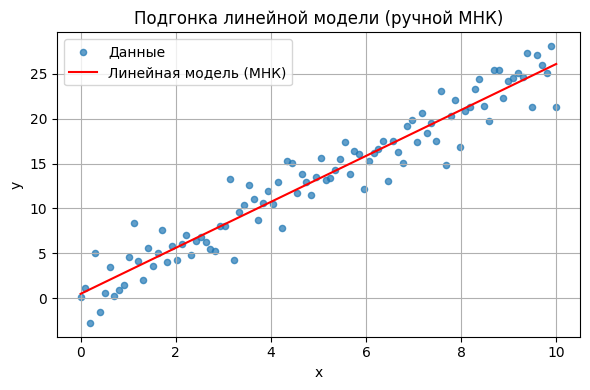

In [15]:
x_line = np.linspace(x.min(), x.max(), 200)
y_line = a_mnk * x_line + b_mnk

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=20, alpha=0.7, label='Данные')
plt.plot(x_line, y_line, 'r', label='Линейная модель (МНК)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Подгонка линейной модели (ручной МНК)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

4) Использование функции `scipy.optimize.curve_fit`

In [16]:
from scipy.optimize import curve_fit

def linear_model(x, a, b):
    return a * x + b

params, cov = curve_fit(linear_model, x, y)
a_fit, b_fit = params

print(f'Коэффициенты через curve_fit: a = {a_fit:.3f}, b = {b_fit:.3f}')

Коэффициенты через curve_fit: a = 2.563, b = 0.476


5) Добавляем ковариационную матрицу параметров для оценки дисперсии

In [17]:
sigma_a = np.sqrt(cov[0, 0])
sigma_b = np.sqrt(cov[1, 1])

print(f'Стандартная ошибка a: {sigma_a:.3f}')
print(f'Стандартная ошибка b: {sigma_b:.3f}')

Стандартная ошибка a: 0.072
Стандартная ошибка b: 0.414


6) Учтем 95% доверительные интервалы параметров. Приближаясь нормальным распределением оценок, для 95% ДИ используем множитель примерно 1.96:

In [18]:
z = 1.96  # для 95% интервала

a_ci = (a_fit - z * sigma_a, a_fit + z * sigma_a)
b_ci = (b_fit - z * sigma_b, b_fit + z * sigma_b)

print(f'95% ДИ для a: [{a_ci[0]:.3f}, {a_ci[1]:.3f}]')
print(f'95% ДИ для b: [{b_ci[0]:.3f}, {b_ci[1]:.3f}]')

95% ДИ для a: [2.423, 2.704]
95% ДИ для b: [-0.336, 1.288]


7) Доверительная полоса для предсказаний. Упрощённый подход: построим предсказания и добавим ±2·σ_остатков как «грубую» полосу.

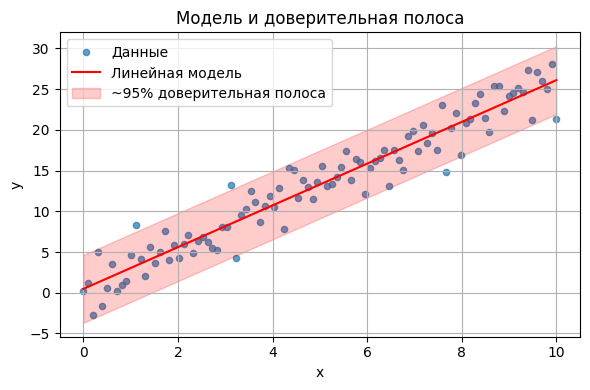

In [19]:
# Оценка остатков и их стандартного отклонения
y_pred = linear_model(x, a_fit, b_fit)
residuals = y - y_pred
sigma_res = residuals.std(ddof=2)

# Предсказания на сетке x_line
y_pred_line = linear_model(x_line, a_fit, b_fit)

# Грубая полоса: ±2 σ_res
y_upper = y_pred_line + 2 * sigma_res
y_lower = y_pred_line - 2 * sigma_res

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=20, alpha=0.7, label='Данные')
plt.plot(x_line, y_pred_line, 'r', label='Линейная модель')
plt.fill_between(x_line, y_lower, y_upper, color='r', alpha=0.2, label='~95% доверительная полоса')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Модель и доверительная полоса')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Задача 4: Сравнение моделей и анализ остатков

Даны измерения (x, y), подходит несколько моделей: линейная, полиномиальная (степени 2 или 3), экспоненциальная.

### Задание:
- Загрузите данные.
- Постройте модели — все три типа.
- Вычислите метрики качества: RSS, R^2, AIC, BIC для каждой.
- Постройте графики остатков vs x, гистограммы остатков.
- Проверьте нормальность остатков тестом Шапиро-Уилка.
- Выберите лучшую модель, объясните выбор.

## Решение задачи 4

1) Загрузка данных и первичный просмотр

          x          y
0  0.000000  11.943142
1  0.067114   5.303648
2  0.134228   3.725270
3  0.201342  -5.952408
4  0.268456   2.100975
                x           y
count  150.000000  150.000000
mean     5.000000   14.016430
std      2.915797    9.133822
min      0.000000   -5.952408
25%      2.500000    6.281013
50%      5.000000   14.835261
75%      7.500000   21.393777
max     10.000000   33.826096


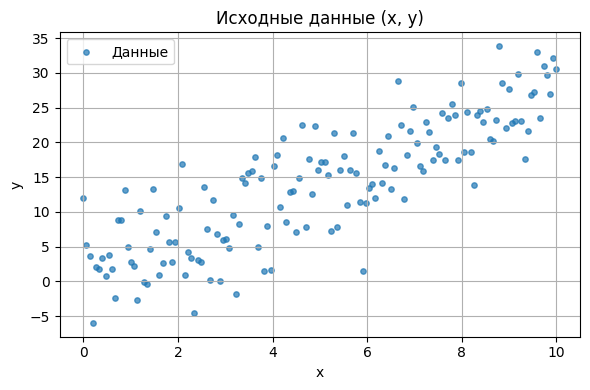

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('task4_model_comparison.csv')
x = df['x'].values
y = df['y'].values

print(df.head())
print(df.describe())

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=15, alpha=0.7, label='Данные')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Исходные данные (x, y)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

2) Определение вспомогательных функций для метрик

In [21]:
from math import log

def rss(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)

def r2_score(y_true, y_pred):
    ss_res = rss(y_true, y_pred)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res / ss_tot

def aic(y_true, y_pred, k):
    n = len(y_true)
    s = rss(y_true, y_pred)
    return n * np.log(s / n) + 2 * k

def bic(y_true, y_pred, k):
    n = len(y_true)
    s = rss(y_true, y_pred)
    return n * np.log(s / n) + k * np.log(n)

3) Выбор модели 1 - линейная регрессия

In [22]:
# Линейная регрессия через polyfit
coef_lin = np.polyfit(x, y, deg=1)
p_lin = np.poly1d(coef_lin)

y_lin = p_lin(x)

rss_lin = rss(y, y_lin)
r2_lin = r2_score(y, y_lin)
k_lin = 2  # a, b
aic_lin = aic(y, y_lin, k_lin)
bic_lin = bic(y, y_lin, k_lin)

print("Линейная модель:")
print("  коэффициенты:", coef_lin)
print(f"  RSS = {rss_lin:.2f}, R^2 = {r2_lin:.4f}, AIC = {aic_lin:.2f}, BIC = {bic_lin:.2f}")

Линейная модель:
  коэффициенты: [2.63513793 0.84074073]
  RSS = 3634.13, R^2 = 0.7076, AIC = 482.12, BIC = 488.14


4) Выполняем визуализацию результата

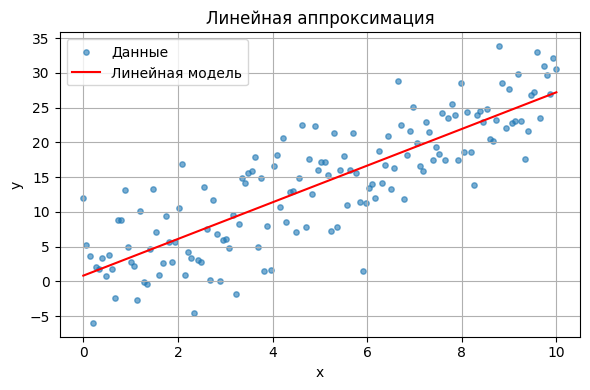

In [23]:
x_plot = np.linspace(x.min(), x.max(), 300)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=15, alpha=0.6, label='Данные')
plt.plot(x_plot, p_lin(x_plot), 'r', label='Линейная модель')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная аппроксимация')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

5) Выбор подели 2 - полиномиальная (степень 2)

In [24]:
deg_poly = 2
coef_poly = np.polyfit(x, y, deg=deg_poly)
p_poly = np.poly1d(coef_poly)

y_poly = p_poly(x)

rss_poly = rss(y, y_poly)
r2_poly = r2_score(y, y_poly)
k_poly = deg_poly + 1  # параметры полинома
aic_poly = aic(y, y_poly, k_poly)
bic_poly = bic(y, y_poly, k_poly)

print(f"Полиномиальная модель степени {deg_poly}:")
print("  коэффициенты:", coef_poly)
print(f"  RSS = {rss_poly:.2f}, R^2 = {r2_poly:.4f}, AIC = {aic_poly:.2f}, BIC = {bic_poly:.2f}")

Полиномиальная модель степени 2:
  коэффициенты: [0.08432671 1.79187088 2.23675329]
  RSS = 3573.28, R^2 = 0.7125, AIC = 481.59, BIC = 490.62


6) Выполняем визуализацию результата

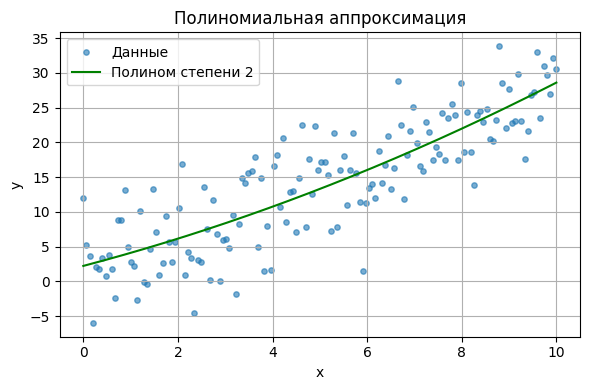

In [25]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=15, alpha=0.6, label='Данные')
plt.plot(x_plot, p_poly(x_plot), 'g', label=f'Полином степени {deg_poly}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Полиномиальная аппроксимация')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

7) Выбор модели 3 - экспоненциальная

In [26]:
mask = y > 0
x_pos = x[mask]
y_pos = y[mask]

ln_y = np.log(y_pos)

# Линейная регрессия для ln(y) = c0 + c1 * x, где c0 = ln A, c1 = B
coef_exp = np.polyfit(x_pos, ln_y, deg=1)
c1, c0 = coef_exp  # polyfit возвращает [c1, c0] для линейного
B = c1
A = np.exp(c0)

print("Экспоненциальная модель y = A * exp(Bx):")
print(f"  A = {A:.3f}, B = {B:.3f}")

y_exp = A * np.exp(B * x)  # предсказания для всех x

rss_exp = rss(y, y_exp)
r2_exp = r2_score(y, y_exp)
k_exp = 2  # A, B
aic_exp = aic(y, y_exp, k_exp)
bic_exp = bic(y, y_exp, k_exp)

print(f"  RSS = {rss_exp:.2f}, R^2 = {r2_exp:.4f}, AIC = {aic_exp:.2f}, BIC = {bic_exp:.2f}")

Экспоненциальная модель y = A * exp(Bx):
  A = 3.181, B = 0.238
  RSS = 4297.67, R^2 = 0.6543, AIC = 507.28, BIC = 513.30


8) Визуализация результата

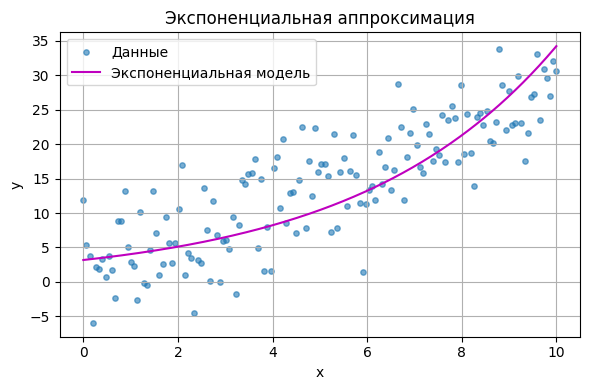

In [27]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=15, alpha=0.6, label='Данные')
plt.plot(x_plot, A * np.exp(B * x_plot), 'm', label='Экспоненциальная модель')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Экспоненциальная аппроксимация')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

9) Сводная таблица метрик

In [28]:
results = pd.DataFrame({
    'model': ['linear', f'poly_{deg_poly}', 'exp'],
    'RSS':   [rss_lin, rss_poly, rss_exp],
    'R2':    [r2_lin, r2_poly, r2_exp],
    'AIC':   [aic_lin, aic_poly, aic_exp],
    'BIC':   [bic_lin, bic_poly, bic_exp]
})

print(results)

    model          RSS        R2         AIC         BIC
0  linear  3634.130850  0.707646  482.123494  488.144765
1  poly_2  3573.279186  0.712541  481.590555  490.622461
2     exp  4297.666512  0.654267  507.278828  513.300099


10) Анализ остатков и проверка нормальности (напр., для лучшей модели)
Предположим, по AIC/BIC лучшей оказалась, скажем, полиномиальная модель (студент должен сделать выбор по таблице).

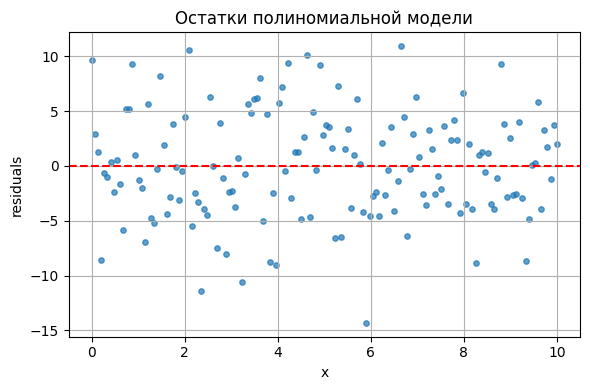

In [29]:
# Остатки для полиномиальной модели
res_poly = y - y_poly

plt.figure(figsize=(6, 4))
plt.scatter(x, res_poly, s=15, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('x')
plt.ylabel('residuals')
plt.title('Остатки полиномиальной модели')
plt.grid(True)
plt.tight_layout()
plt.show()

11) Гистограмма остатков

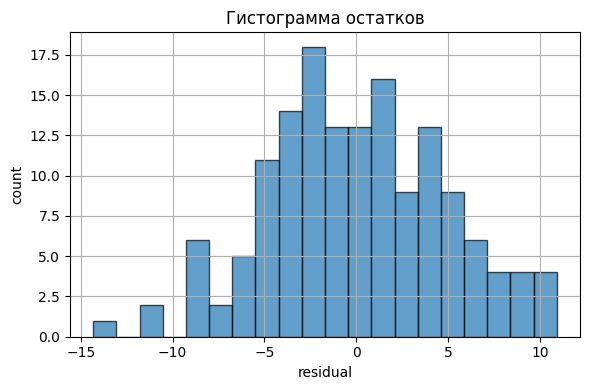

In [30]:
plt.figure(figsize=(6, 4))
plt.hist(res_poly, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('residual')
plt.ylabel('count')
plt.title('Гистограмма остатков')
plt.grid(True)
plt.tight_layout()
plt.show()

12) Тест Шапиро-Уилка на нормальность остатков

In [31]:
from scipy.stats import shapiro

stat, p_value = shapiro(res_poly)
print(f"Тест Шапиро–Уилка: статистика = {stat:.4f}, p-value = {p_value:.4f}")

if p_value > 0.05:
    print("Гипотеза о нормальности остатков НЕ отвергается (остатки совместимы с нормальными).")
else:
    print("Гипотеза о нормальности остатков отвергается (остатки заметно ненормальны).")

Тест Шапиро–Уилка: статистика = 0.9926, p-value = 0.6368
Гипотеза о нормальности остатков НЕ отвергается (остатки совместимы с нормальными).


13) Интерпретация (что студент должен сформулировать)
По таблице метрик выбрать модель с:

* меньшим RSS (лучше аппроксимирует данные);
* более высоким $R^2$ ;
* минимальными AIC и BIC (баланс точности и числа параметров).​

Проверить, не демонстрируют ли остатки:

* систематический тренд (значит модель неадекватна);
* сильную ненормальность (могут быть выбросы, неверный функциональный вид).

Если нужно, можно добавить ещё одну модель (полином степени 3) и расширить сравнительную таблицу, чтобы студенты увидели эффект «переобучения» по RSS и $R^2$ и роль AIC/BIC.

## Задача 5: Анализ данных физического эксперимента - изучение зависимости периода маятника от длины

В csv данные — измеренная длина "L" маятника и период колебаний "T", с шумом и выбросами.
### Задание:
- Загрузите данные.
- Очистите данные от выбросов с помощью метода интерквартильного размаха (IQR).
- Линеаризуйте модель: $T^2 = \frac{4 \pi^2}{g} L$.
- Подберите параметры через линейную регрессию, оцените ускорение свободного падения и доверительный интервал.
- Постройте графики: исходные данные $T(L)$, линеаризованный график $T^2(L)$ с линией аппроксимации и теоретической моделью.
- Кратко прокомментируйте влияние очистки данных на оценку $g$.

## Решение задачи 5

1) Загрузка и визуализация исходных данных

          L         T
0  0.200000  0.899668
1  0.236735  1.001057
2  0.273469  0.999263
3  0.310204  1.151978
4  0.346939  1.160688
               L          T
count  50.000000  50.000000
mean    1.100000   2.059773
std     0.535496   0.543291
min     0.200000   0.899668
25%     0.650000   1.688445
50%     1.100000   2.137798
75%     1.550000   2.531170
max     2.000000   2.878833


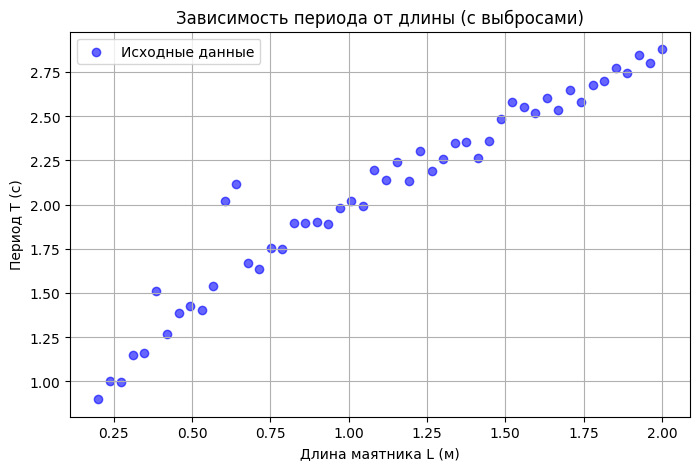

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('task5_pendulum.csv')

L = df['L'].values
T = df['T'].values

print(df.head())
print(df.describe())

plt.figure(figsize=(8, 5))
plt.scatter(L, T, label='Исходные данные', color='blue', alpha=0.6)
plt.xlabel('Длина маятника L (м)')
plt.ylabel('Период T (с)')
plt.title('Зависимость периода от длины (с выбросами)')
plt.grid(True)
plt.legend()
plt.show()

2) Очистка данных от выбросов (метод IQR для остатков). Простая фильтрация по самим значениям $T$ может быть некорректной, так как $T$ меняется с $L$. П Правильнее оценить грубую модель и фильтровать отклонения от неё, или просто фильтровать «аномально большие» $T$ при малых $L$, если выбросы явные.

Однако, в задании часто подразумевают простой подход: фильтрация по отклонению от медианного тренда. Сделаем так: Вычислим величину $k=\frac{T}{\sqrt{L}} ≈ \frac{2\pi}{\sqrt{g}} = const$. Отфильтруем выбросы именно по этой величине
$k$.

Найдено выбросов: 3
Нижняя граница k: 1.857, Верхняя граница k: 2.160


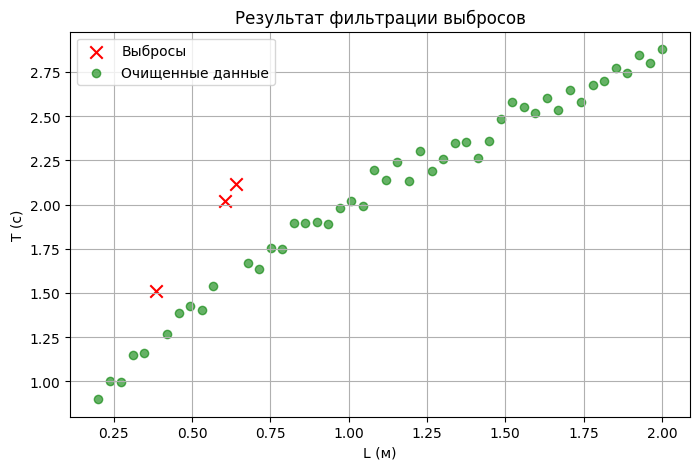

In [33]:
# Приведенная величина k = T / sqrt(L)
k_vals = T / np.sqrt(L)

# Вычисляем квартили и IQR для k
Q1 = np.percentile(k_vals, 25)
Q3 = np.percentile(k_vals, 75)
IQR = Q3 - Q1

# Границы выбросов (стандартный коэффициент 1.5)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Маска "хороших" данных
mask = (k_vals >= lower_bound) & (k_vals <= upper_bound)

L_clean = L[mask]
T_clean = T[mask]
n_outliers = len(L) - len(L_clean)

print(f"Найдено выбросов: {n_outliers}")
print(f"Нижняя граница k: {lower_bound:.3f}, Верхняя граница k: {upper_bound:.3f}")

# Визуализация очистки
plt.figure(figsize=(8, 5))
plt.scatter(L[~mask], T[~mask], label='Выбросы', color='red', marker='x', s=80)
plt.scatter(L_clean, T_clean, label='Очищенные данные', color='green', alpha=0.6)
plt.xlabel('L (м)')
plt.ylabel('T (с)')
plt.title('Результат фильтрации выбросов')
plt.grid(True)
plt.legend()
plt.show()

In [34]:
x_lin = L_clean
y_lin = T_clean**2

# Линейная регрессия через curve_fit (модель y = a*x + b)
from scipy.optimize import curve_fit

def linear_model(x, a, b):
    return a * x + b

params, cov = curve_fit(linear_model, x_lin, y_lin)
a_fit, b_fit = params

# Ошибки параметров (диагональ ковариационной матрицы)
sigma_a = np.sqrt(cov[0, 0])

print(f"Параметры прямой (T^2 vs L): a = {a_fit:.4f} ± {sigma_a:.4f}, b = {b_fit:.4f}")


Параметры прямой (T^2 vs L): a = 4.0556 ± 0.0619, b = -0.0150


In [35]:
g_est = 4 * np.pi**2 / a_fit
print(f"Оценка ускорения свободного падения g: {g_est:.3f} м/с^2")


Оценка ускорения свободного падения g: 9.734 м/с^2


In [36]:
sigma_g = g_est * (sigma_a / a_fit)

# 95% доверительный интервал (z=1.96)
g_lower = g_est - 1.96 * sigma_g
g_upper = g_est + 1.96 * sigma_g

print(f"Стандартная ошибка g: {sigma_g:.3f}")
print(f"95% ДИ для g: [{g_lower:.3f}, {g_upper:.3f}] м/с^2")


Стандартная ошибка g: 0.148
95% ДИ для g: [9.443, 10.025] м/с^2


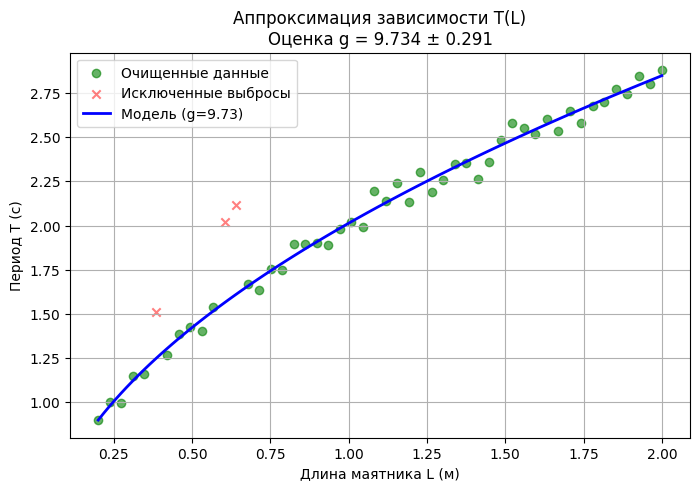

In [37]:
# Теоретическая кривая с найденным g
L_plot = np.linspace(min(L), max(L), 100)
T_model = 2 * np.pi * np.sqrt(L_plot / g_est)

plt.figure(figsize=(8, 5))
# Исходные очищенные данные
plt.scatter(L_clean, T_clean, label='Очищенные данные', color='green', alpha=0.6)
# Исходные выбросы (для наглядности)
plt.scatter(L[~mask], T[~mask], label='Исключенные выбросы', color='red', marker='x', alpha=0.5)
# Модель
plt.plot(L_plot, T_model, 'b-', linewidth=2, label=f'Модель (g={g_est:.2f})')

plt.xlabel('Длина маятника L (м)')
plt.ylabel('Период T (с)')
plt.title(f'Аппроксимация зависимости T(L)\nОценка g = {g_est:.3f} ± {1.96*sigma_g:.3f}')
plt.grid(True)
plt.legend()
plt.show()

Краткий вывод:

Очистка данных методом IQR по приведенной величине позволила исключить грубые выбросы. Линеаризация зависимости дала возможность применить линейную регрессию и получить оценку $g$ с доверительным интервалом. Если бы выбросы не были удалены, метод наименьших квадратов («чувствительный» к выбросам) дал бы сильно смещенную оценку $g$ и завышенную ошибку.

Это решение завершает серию задач и показывает полный цикл обработки экспериментальных данных.